## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
import warnings 
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data = pd.read_csv("C:/Users/91898/My Uber Drives - 2016.csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Shape of the dataset

In [3]:
data.shape

(1156, 7)

In [4]:
data.size

8092

## Information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Checking for the null values

In [6]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

## Finding the count of null values

In [7]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

## Finding the percentage of null values

In [8]:
data.isnull().sum()/len(data)*100

START_DATE*     0.000000
END_DATE*       0.086505
CATEGORY*       0.086505
START*          0.086505
STOP*           0.086505
MILES*          0.000000
PURPOSE*       43.512111
dtype: float64

## Droping the null values

In [9]:
data1 = data.dropna()

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


## Checking for the data types

In [11]:
data1.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

## Replacing the * from columns names

In [12]:
data1.columns = data1.columns.str.replace('*','')
data1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  653 non-null    object 
 1   END_DATE    653 non-null    object 
 2   CATEGORY    653 non-null    object 
 3   START       653 non-null    object 
 4   STOP        653 non-null    object 
 5   MILES       653 non-null    float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


## Converting object to datetime 

In [14]:
data1['START_DATE'] = pd.to_datetime(data1['START_DATE'],format = '%m/%d/%Y %H:%M') 
data1['END_DATE'] = pd.to_datetime(data1['END_DATE'],format = '%m/%d/%Y %H:%M') 

In [15]:
data1.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

## Extracting hour,day,dayofweek,month,weekday

In [16]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for i in data1['START_DATE']:
    hour.append(i.hour)
    day.append(i.day)
    dayofweek.append(i.dayofweek)
    month.append(i.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

data1['HOUR'] = hour
data1['DAY'] = day
data1['DAY OF WEEK'] = dayofweek
data1['MONTH'] = month
data1['WEEKDAY'] = weekday

In [17]:
data1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [18]:
BUS = data1.groupby('CATEGORY').sum().loc['Business']['MILES']
PER = data1.groupby('CATEGORY').sum().loc['Personal']['MILES']
total_miles = BUS+PER
business_ratio = BUS * 100 / total_miles
personal_ratio = PER * 100 / total_miles

print('Business Rides Ratio :',business_ratio)
print('Personal Rides Ratio :',personal_ratio)


Business Rides Ratio : 97.07982273771748
Personal Rides Ratio : 2.920177262282525


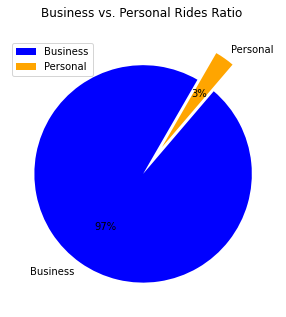

In [19]:
labels = ['Business','Personal']
sizes = [business_ratio,personal_ratio]
colors = ['blue','orange']
explode = [0,0.3]
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels ,explode=explode, colors=colors, autopct='%.0f%%', startangle=60)
plt.title('Business vs. Personal Rides Ratio \n') 
plt.legend()
plt.show()

### Count of various category

In [20]:
data1['CATEGORY'].value_counts()

Business    647
Personal      6
Name: CATEGORY, dtype: int64

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

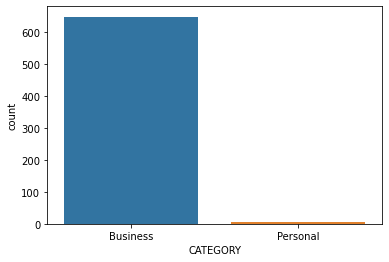

In [21]:
sns.countplot(x='CATEGORY',data = data1)

<AxesSubplot:ylabel='Frequency'>

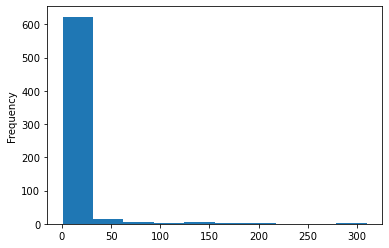

In [22]:
data1['MILES'].plot.hist()

### 

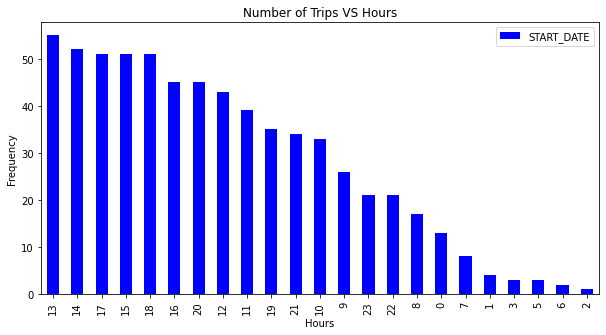

In [23]:
hours = data1['START_DATE'].dt.hour.value_counts()
hours.plot(kind= 'bar',color='blue',figsize = (10,5) )
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips VS Hours')
plt.legend()
plt.show()

### What are the various purposes

In [24]:
data1['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

<AxesSubplot:>

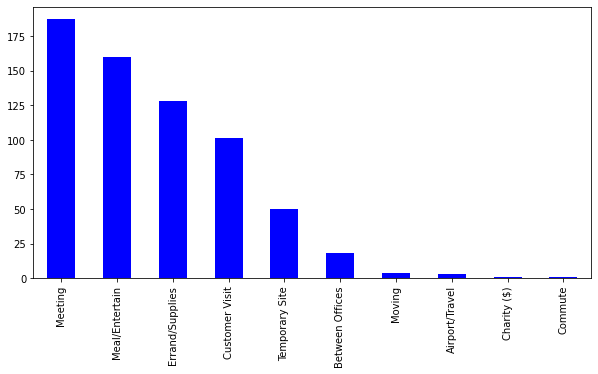

In [26]:
data1['PURPOSE'].value_counts().plot(kind = 'bar',figsize = (10,5),color = 'blue')

### Which week day did the driver receive most of the rides

In [27]:
data1['WEEKDAY'].value_counts()

Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: WEEKDAY, dtype: int64

<AxesSubplot:>

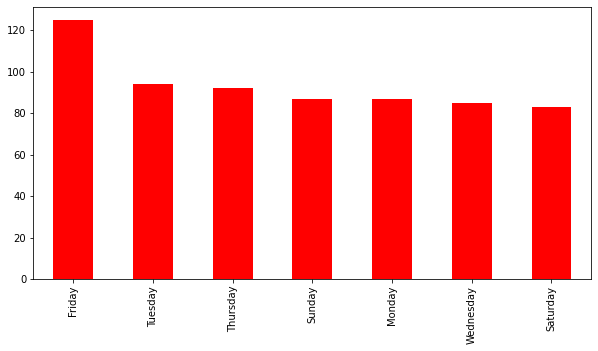

In [28]:
data1['WEEKDAY'].value_counts().plot(kind = 'bar',figsize = (10,5),color = 'red')

### Which day did the driver receive most of the rides

In [29]:
data1['DAY'].value_counts()

21    31
29    30
19    30
18    30
4     28
28    27
12    27
8     25
1     25
22    24
7     23
20    22
6     22
14    21
11    21
5     21
3     20
26    20
27    20
25    19
10    19
2     18
24    18
13    17
15    16
17    16
16    15
23    14
30    12
9     12
31    10
Name: DAY, dtype: int64

<AxesSubplot:>

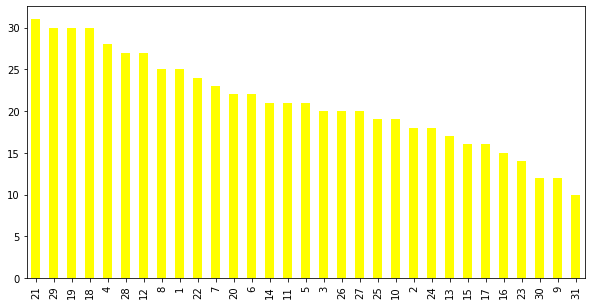

In [30]:
data1['DAY'].value_counts().plot(kind = 'bar',figsize = (10,5),color = 'yellow')

### Which month did the driver receive most of the rides

In [31]:
data1['MONTH'].value_counts()

12    134
2      82
6      73
3      71
11     60
1      59
4      50
5      46
7      46
10     20
8      12
Name: MONTH, dtype: int64

<AxesSubplot:>

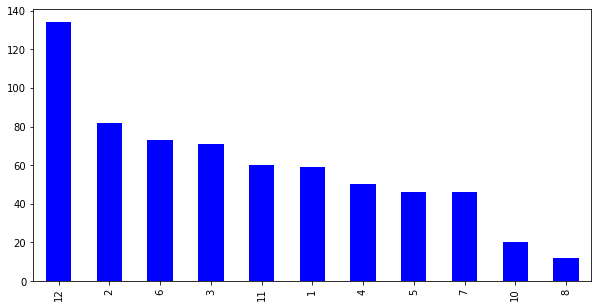

In [32]:
data1['MONTH'].value_counts().plot(kind = 'bar',figsize = (10,5),color = 'blue')

### Top 15 Start locations

In [33]:
x=data1['START'].value_counts()
x.head(15)

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Apex                 11
Midtown              11
Berkeley              8
San Francisco         7
The Drag              6
Kissimmee             5
Name: START, dtype: int64

<AxesSubplot:>

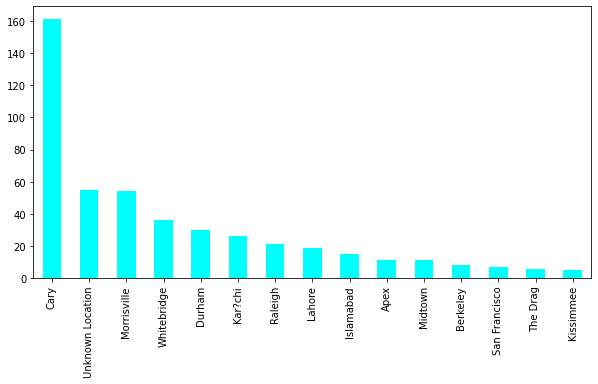

In [34]:
x.head(15).plot(kind = 'bar',figsize = (10,5),color = 'cyan')

####  Show the top 10 rides according to MILES column

In [35]:
data1.sort_values(by = 'MILES', ascending = False).head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,16,25,4,3,Friday
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201.0,Meeting,22,25,4,3,Friday
559,2016-07-17 12:20:00,2016-07-17 15:25:00,Personal,Boone,Cary,180.2,Commute,12,17,6,7,Sunday
297,2016-04-02 19:38:00,2016-04-02 22:36:00,Business,Jacksonville,Ridgeland,174.2,Customer Visit,19,2,5,4,Saturday
299,2016-04-03 02:00:00,2016-04-03 04:16:00,Business,Florence,Cary,159.3,Meeting,2,3,6,4,Sunday
268,2016-03-25 13:24:00,2016-03-25 16:22:00,Business,Cary,Latta,144.0,Customer Visit,13,25,4,3,Friday
298,2016-04-02 23:11:00,2016-04-03 01:34:00,Business,Ridgeland,Florence,144.0,Meeting,23,2,5,4,Saturday
232,2016-03-17 12:52:00,2016-03-17 15:11:00,Business,Austin,Katy,136.0,Customer Visit,12,17,3,3,Thursday
870,2016-10-28 18:13:00,2016-10-28 20:07:00,Business,Winston Salem,Asheville,133.6,Meeting,18,28,4,10,Friday
869,2016-10-28 15:53:00,2016-10-28 17:59:00,Business,Cary,Winston Salem,107.0,Meeting,15,28,4,10,Friday


### Getting the row with maximum MILES

In [36]:
 data1.sort_values(by = 'MILES',ascending = False).head(1)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,16,25,4,3,Friday


In [37]:
data1['START'].nunique()

131

#### How many miles was covered per category per pourpose ?

In [38]:
result = data1.groupby(['CATEGORY','PURPOSE'])['MILES'].sum().sort_values(ascending=False).reset_index(name = 'Total Miles')
result

,CATEGORY,PURPOSE,Total Miles
0,Business,Meeting,2851.3
1,Business,Customer Visit,2089.5
2,Business,Meal/Entertain,911.7
3,Business,Temporary Site,523.7
4,Business,Errand/Supplies,508.0
5,Business,Between Offices,197.0
6,Personal,Commute,180.2
7,Personal,Moving,18.2
8,Business,Airport/Travel,16.5
9,Personal,Charity ($),15.1


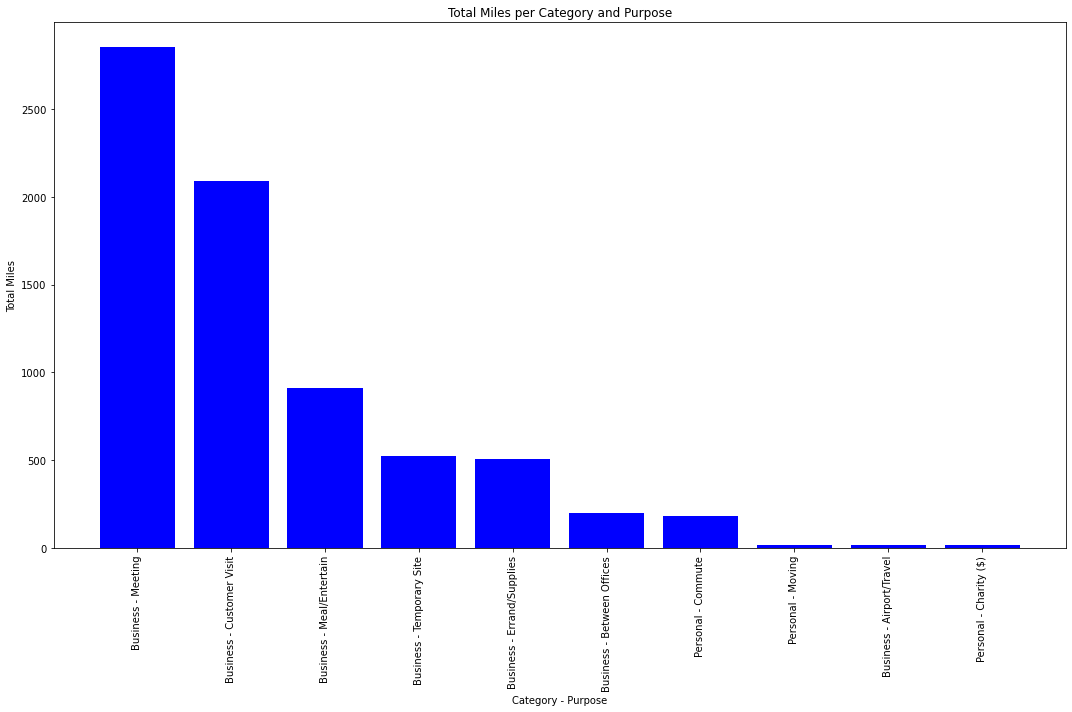

In [39]:
plt.figure(figsize=(15, 10))
plt.bar(result['CATEGORY'] + ' - ' + result['PURPOSE'], result['Total Miles'], color='blue')
plt.xlabel('Category - Purpose')
plt.ylabel('Total Miles')
plt.title('Total Miles per Category and Purpose')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Identify the most popular START. STOP pair - (By the count of travels)

In [40]:
result = data1.groupby(['START','STOP']).size().sort_values(ascending = False).reset_index(name = 'COUNT').head(10)
result

,START,STOP,COUNT
0,Cary,Morrisville,52
1,Morrisville,Cary,51
2,Cary,Cary,44
3,Unknown Location,Unknown Location,30
4,Cary,Durham,30
5,Durham,Cary,29
6,Kar?chi,Kar?chi,20
7,Cary,Raleigh,17
8,Lahore,Lahore,16
9,Raleigh,Cary,15


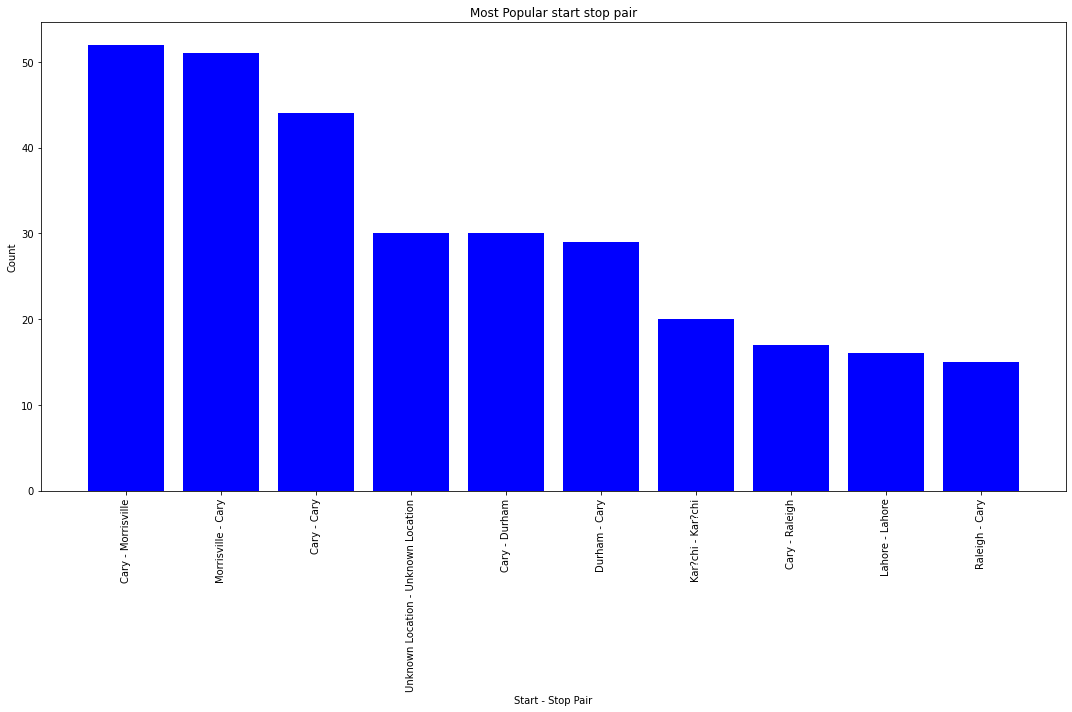

In [41]:
plt.figure(figsize=(15, 10))
plt.bar(result['START'] + ' - ' + result['STOP'], result['COUNT'], color='blue')
plt.xlabel('Start - Stop Pair')
plt.ylabel('Count')
plt.title('Most Popular start stop pair')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Starting and Stoping wrt highest MILES covered

In [42]:
data1[data1['MILES'] == max(data1["MILES"])][['START','STOP']]

,START,STOP
269,Latta,Jacksonville


### Storing the data which is not having unknown location is START/STOP column


In [43]:
data1[data1['START'] != 'Unknown Location']
data1[data1['STOP'] != 'Unknown Location']

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,16,30,4,12,Friday
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23,30,4,12,Friday
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


In [44]:
import pandas_profiling as pp
profile = pp.ProfileReport(data1)

profile.to_file('uber.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]